
# CSCE633 Fall 2022 (Total 100 pts)

**Machine Learning**

**Homework 4**

Instructor: Yoonsuck Choe

Nov 4, 2022


---

**Student name: ** Chauhan, Ashutosh


---

# Common instructions (Read carefully)

**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```

# Section I: Dimensionality Reduction

**Problem 1 (Written: 10pts):** 

Consider the data sets below: Data set 1 = Spiral data, Data set 2 = Point cloud data, and Data set 3 = simple data. You can plot the data first. 
- Plot the first column in the data against the second column
``` D1[:,0] , D1[:,1] ```
- Make sure you use aspect ratio of 1 when plotting, so that the x- and y-axis have the same scale.
```
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(....)
```
- Use "." for plotting style:  
```plt.plot(...,".") ```

(1) Which of the three data sets D1, D2, and D3 would be the most appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

(2) Which of the three data sets D1, D2, and D3 would be the least appropriate for  PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

**Hint:** 
- Although the data are not labled into different classes, you may be able to "see" two possible groups of points in each data set. When you use  PCA to project all the data points to the PCA space (using the 1st and 2nd principal component vectors), would you be able to distinguish the two groups, just based on the 1st principal component axis? 
- Also, you can think about the variance in the original data (along the two axes) and the variance in the resulting projection (along the two principal component axes). 



**Answer:**

Fill out the code cell below for the plot, and enter your answer here:

(1) Among D1, D2 and D3, D3 would be the best choice for dimensionality reduction using PCA. When we project data points to PCA space (using 1st and 2nd principle component) the variance along 1st principle compnent will be very high and along 2nd principle axis will be very low. This will help us to distinguish data just based on the 1st principal component axis. In D1 and D2 variance along both compnents will be high.

(2) Among D1, D2 and D3, D1 would be the least suitable choice for dimensionality reduction using PCA. When we project data points to PCA space (using 1st and 2nd principle component) the variance along both principle axis will be similar as data points are evenly distributed in D1. Therefore D1 is not suitable for dimensionality reduction using PCA.

D1 shape is (189, 2)
D2 shape is (800, 2)
D3 shape is (6, 2)


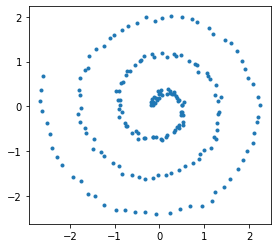

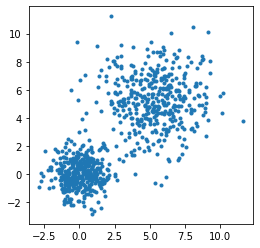

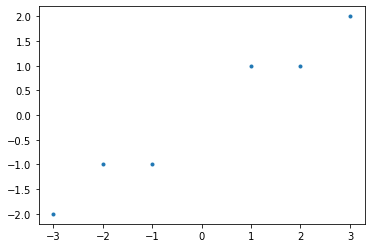

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#--------------------
def spiral_1(t):
#--------------------
  '''
  parametric curve of a spiral : clockwise
  '''
  rand_factor = 1.0

  dat   = np.array([(t+1)*np.sin(t+5), (t+1)*np.cos(t+5)])
  noise = np.random.rand(2,len(dat[0,:]))*rand_factor
  return (dat+noise-0.5)/7.5


"""
Data set 1 : D1 = spiral like data

- This is a variation on the parametric plot for a circle [cos(t), sin(t)], with a gradually increasing radius. 
"""

# data set 1 [x, y]

t = np.arange(0, 6*np.pi, 0.1)
D1 =  np.transpose(spiral_1(t))
print('D1 shape is',D1.shape)
# Plot it
# -- add your plotting code here
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
ax.plot(D1[:,0],D1[:,1],'.')  
ax.set_aspect(1)

"""
Data set 2 : D2 = point cloud data (normal distribution)
"""

x = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))
y = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))

D2 = np.vstack((x,y)).T

# Plot it 
# -- add your plotting code here
print('D2 shape is',D2.shape)
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
ax.plot(D2[:,0],D2[:,1],'.')  
ax.set_aspect(1)

"""
Data set 3: D3 = simple data
"""

D3 = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print('D3 shape is',D3.shape)
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
ax.plot(D3[:,0],D3[:,1],'.')  
ax.set_aspect(1)

# Plot it
# -- add your plotting code here : use aspect ratio 1 (see below)


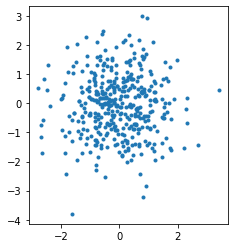

In [ ]:
# Example plotting code

# data 
x = np.random.normal(0,1,400)
y = np.random.normal(0,1,400)

# plot
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(x,y,'.')  
ax.set_aspect('equal') # set aspect ratio to 1.0

**Problem 2 (Program: 15pt)**

Use scikit learn's PCA package to analyze the data set from problem 1. Use the template below.

```
from sklearn.decomposition import PCA

X = .... # data (you can reuse D1, D2, D3 from above (Problem 1)

# plot X : X[:,0] against X[:,1]

pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)

Z = pca.fit_transform(X)


# plot Z : Z[:,0] against Z[:,1]

```

For each of the three data sets D1, D2, D3: 

(1) [1pt] Plot the original data set (X). Fix aspect ratio to 1. 

(2) [1pt] Plot the projected data set (Z). Fix aspect ratio to 1. 

(3) [2pt] Compare the variance along the first and second principal component vectors (```pca.singular_values_```) for each data set.

- D1: 
- D2:
- D3: 

(4) [6pt] Comment on how these results relate to your answers in Problem 1. 





**Answer:**

Fill out the code in the code cell below, and enter your answer here: 

(1) Just refer to the code below. 

(2) Just refer to the code below.

(3) 
- D1: variance of first principle compo is 15.73157619 
- D1: variance of second principle compo is 14.57418233

Both principal axis components in D1 have variance almost similar.

- D2: variance of first principle compo is 114.24833385
- D2: variance of second principle compo is 44.05978959

Variance along first principal axis component is very high compared to second in D2 dataset.

- D3: variance of first principle compo 6.30061232 
- D3: variance of second principle compo 0.54980396

Variance along second principal component is very low (negligible) compared to first component in D3 dataset. 

(4) 
- Dataset D1 - we can observe that the variance along both 1st and 2nd principal components is very high and similar. This is because the dataset is evenly distributed. This will therefore not give any advantage over current axis if we will do dimentionality reduction using PCA. This is clear form the plots also, both initial and PCA plots looks similar.

- Dataset D2 - We can observe that there is difference in variance values of 1st principle component and 2nd principle component. Variance of 1st principal component is high compared to second component but still the variance of second is comparable. This makes it better choice for PCA compared to D1 dataset.

- Dataset D3 - The variance of 1st principal component is high compared to the variance of 2nd principle component. Variance of second principle component is negligible. This makes data D3 best choice for dimentionality reduction using PCA as it could project data better along one axis. It could easily be convert to 1D from 2D given data. This is clear from the plots also, we can see the plot after PCA place the data mainly along 1 axis only.


D1 shape is (189, 2)
Z1 shape is (189, 2)
D1 eigenvalues [15.73157619 14.57418233]
D2 shape is (800, 2)
Z2 shape is (800, 2)
D2 eigenvalues [114.24833385  44.05978959]
D3 shape is (6, 2)
Z3 shape is (6, 2)
D3 eigenvalues [6.30061232 0.54980396]


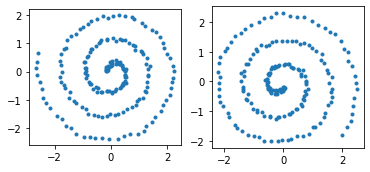

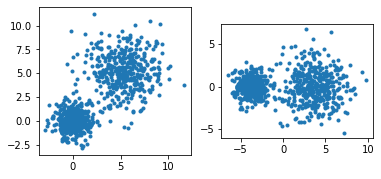

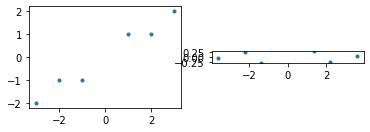

In [ ]:
"""
Write your PCA code here, and plot the original data and the projected data 
"""

from sklearn.decomposition import PCA

# X = np.array([[-1, -1], [1,1]]) # data (you can reuse D1, D2, D3 from above (Problem 1)

# IMPLEMENT THIS: plot the input X here : X[:,0] against X[:,1]

# 1. set up with input dimension = 2
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=2)

# 2. analyze data X 
pca1.fit(D1)
pca2.fit(D2)
pca3.fit(D3)

# 3. print eigenvalues 
# print('D1 eigenvalues',pca1.singular_values_)
# print('D2 eigenvalues',pca2.singular_values_)
# print('D3 eigenvalues',pca3.singular_values_)

# 4. project data X to PCA space 
Z1 = pca1.fit_transform(D1)
Z2 = pca2.fit_transform(D2)
Z3 = pca3.fit_transform(D3)


# IMPLEMENT THIS: plot the projected Z here : Z[:,0] against Z[:,1]

print('D1 shape is',D1.shape)
print('Z1 shape is',Z1.shape)
print('D1 eigenvalues',pca1.singular_values_)
fig = plt.figure().subplots(1, 2)
fig[0].set_aspect(1)
fig[1].set_aspect(1)
fig[0].plot(D1[:,0],D1[:,1],'.')
fig[1].plot(Z1[:,0],Z1[:,1],'.')  


print('D2 shape is',D2.shape)
print('Z2 shape is',Z2.shape)
print('D2 eigenvalues',pca2.singular_values_)
fig1 = plt.figure().subplots(1, 2)
fig1[0].set_aspect(1)
fig1[1].set_aspect(1)
fig1[0].plot(D2[:,0],D2[:,1],'.')
fig1[1].plot(Z2[:,0],Z2[:,1],'.')

print('D3 shape is',D3.shape)
print('Z3 shape is',Z3.shape)
print('D3 eigenvalues',pca3.singular_values_)
fig2 = plt.figure().subplots(1, 2)
fig2[0].set_aspect(1)
fig2[1].set_aspect(1)
fig2[0].plot(D3[:,0],D3[:,1],'.')
fig2[1].plot(Z3[:,0],Z3[:,1],'.')




**Problem 3 (Written: 15 pts):**

(1) Explain why manifold learning can effectively handle data like the data set D1 in Problem 1 (the spiral data). [5pt]

(2) For the spiral data (data set D1), what would be an appropriate $\epsilon$ value for use in ISOMAP? Give a specific value as your answer (e.g. $\epsilon = 2.5$), and explain your reasoning. **Hint:** By eyeballing the data, you can see that $\epsilon$ cannot be less than a certain value (graph will be disconnected), while it cannot be greater than a certain value (points across different parts of the spiral will be connected), in order to recover the manifold structure. Pick a number between these two bounds.  [10pt] 


**Answer:**

(1) Dataset D1 is a 1D manifold embedded in 2D embedding space. Manifold learning could easily recover a 1D structure from D1 and hence it is a viable method for effectively handling such datasets. Manifold learning uses geodesic distance instead of euclidean distance which will help recovering 1D structure from given manifold easily.

(2) For the given spiral data most appropriate 𝜖  value for use in ISOMAP should be something not greater than 0.8 and not smaller than 0.3.   
𝜖= 0.4 should be the most suitable value for computing. 
For 𝜖 value greater than 0.8 the ISOMAP algorithm will even start to take the values from next fold instead of direct neighbours which which not recover a true 1D structure. Whereas since their are few points in manifold that have distance between them which is around 0.3 so keeping 𝜖 < 0.3 will break the structure and not match neighbours at such scenarios. So 0.4 will be most suitable value in my opinion. 

# Section II: Conditional Independence 

**Problem 4 (Written: 10pts)**

Consider three binary variables $a, b, c \in \{0,1\}$ having the
joint probability distribution given in the table below. Show by direct
evaluation that this distribution has the property that $a$ and $b$ are 
dependent, so that $P(a,b) \neq P(a)p(b)$, but that they become independent
when conditioned on $c$, so that $ P(a,b|c) = P(a|c)p(b|c)$ for both
$c=0$ and $c=1$ [adapted from C. M. Bishop, *Pattern Recognition and Machine Learning*, Springer, 2006].

> $a$ | $b$ | $c$ | P($a$,$b$,$c$)
> --- | --- | --- | ---
> 0 | 0 | 0 | 0.375 
> 0 | 0 | 1 | <strike>0.005</strike> 0.05 (typo fixed!)
> 0 | 1 | 0 | 0.041667 
> 0 | 1 | 1 | 0.075
> 1 | 0 | 0 | 0.075 
> 1 | 0 | 1 | 0.15
> 1 | 1 | 0 | 0.008333
> 1 | 1 | 1 | 0.225


**Answer:**

- P(a=0) = 0.541667
- P(a=1) = 0.458333
- P(b=0) = 0.65
- P(b=1) = 0.35

- P(a=0, b=0) = 0.425
- P(a=0, b=1) = 0.116667
- P(a=1, b=0) = 0.225
- P(a=1, b=1) = 0.233333

Tabulate your results in the following format:

> $a$ | $b$ | P($a$,$b$) | P($a$)P($b$)
> --- | --- | --- | ---
> 0 | 0 | p(a=0,b=0) = 0.425| 0.35208355
> 0 | 1 | p(a=0,b=1) = 0.116667 | 0.18958345
> 1 | 0 | p(a=1,b=0) = 0.225| 0.29791645
> 1 | 1 | p(a=1,b=1) = 0.233333| 0.16041655

As $P(a,b) \neq P(a)p(b)$, a and b are dependent


- P(c=0) = 0.5
- P(c=1) = 0.5

- p(a=0,b=0|c=0) = $$\frac{p(a=0,b=0,c=0)}{P(c=0)} =  0.75$$

- p(a=0,b=0|c=1) = $$\frac{p(a=0,b=0,c=1)}{P(c=1)} =  0.1$$

- p(a=0,b=1|c=0) = $$\frac{p(a=0,b=1,c=0)}{P(c=0)} =  0.083334$$

- p(a=0,b=1|c=1) = $$\frac{p(a=0,b=1,c=1)}{P(c=1)} =  0.15$$

- p(a=1,b=0|c=0) = $$\frac{p(a=1,b=0,c=0)}{P(c=0)} =  0.15$$

- p(a=1,b=0|c=1) = $$\frac{p(a=1,b=0,c=1)}{P(c=1)} =  0.3$$

- p(a=1,b=1|c=0) = $$\frac{p(a=1,b=1,c=0)}{P(c=0)} =  0.016666$$

- p(a=1,b=1|c=1) = $$\frac{p(a=1,b=1,c=1)}{P(c=1)} =  0.45$$

- P(a=0, c=0) = 0.416667
- P(a=0, c=1) = 0.125
- P(a=1, c=0) = 0.083333
- P(a=1, c=1) = 0.375

- P(b=0, c=0) = 0.45
- P(b=0, c=1) = 0.225
- P(b=1, c=0) = 0.05
- P(b=1, c=1) = 0.3

- P(a=0|c=0) = $$\frac{P(a=0,c=0)}{P(c=0)} = 0.833334$$
- P(b=0|c=0) = $$\frac{P(b=0,c=0)}{P(c=0)} = 0.9$$
- P(a=0|c=0)(b=0|c=0) = 0.75

Calulating similarly other probabilities we get.


> $a$ | $b$ | $c$ | P($a$,$b$$\mid$$c$) | P($a|c$)P($b|c$)
> --- | --- | --- | --- | ---
> 0 | 0 | 0 | p(a=0,b=0\|c=0) = 0.75 | 0.75
> 0 | 0 | 1 | p(a=0,b=0\|c=1) = 0.1 | 0.1
> 0 | 1 | 0 | p(a=0,b=1\|c=0) = 0.083334 | 0.083334
> 0 | 1 | 1 | p(a=0,b=1\|c=1) = 0.15 | 0.15
> 1 | 0 | 0 | p(a=1,b=0\|c=0) = 0.15 | 0.15
> 1 | 0 | 1 | p(a=1,b=0\|c=1) = 0.3 | 0.3
> 1 | 1 | 0 | p(a=1,b=1\|c=0) = 0.016666 | 0.016666
> 1 | 1 | 1 | p(a=1,b=1\|c=1) = 0.45 | 0.45

Since values of $P(a,b|c) = P(a|c)P(b|c)$. We can say that a and b become independent when conditioned on 𝑐

**Program 5 (Written: 10pts)**

How is the above result related to the concept of conditional independence $P(a|b,c) = P(a|c)$, $a$ is independent from $b$ given $c$? (derive $P(a|b,c) = P(a|c)$ if $ P(a,b|c) = P(a|c)p(b|c)$: **DO NOT** simply plug in the probability values from above.

**Answer**:

Given $P(a,b|c) = P(a|c)P(b|c)$

Show $P(a|b,c) = \frac{P(a,b,c)}{P(b,c)} $ .....(1)

we know, 

$P(b,c) = P(b|c)P(c)$

keeping this in equation (1), we get

$P(a|b,c) = \frac{P(a,b,c)}{P(b|c)P(c)} $ .......(2)

Also,

$P(a,b|c) = \frac{P(a,b,c)}{P(c)} $ .....(3)

$P(a,b,c) = P(a,b|c)P(c) $ .....(4)

Substituting eqn 4in eqn 2, we get,

$P(a|b,c) = \frac{P(a,b|c)P(c)}{P(c)P(b|c)} $ 

$P(a|b,c) = \frac{P(a,b|c)}{P(b|c)} $ .....(5)

it is given that,

$P(a,b|c) = P(a|c)P(b|c)$ Keeping eqn 5 in this, we get,

$P(a|b,c) = \frac{P(a|c)P(b|c)}{P(b|c)} $ 

$P(a|b,c) = P(a|c) $

Hence, proved



# Section III: Naive Bayes Classifier





Consider the data set below, for spam detection. 

We will use the Naive Bayes Classifier to learn from this data and predict new sentences. 

> Sentence | Spam
> --- | ---  
> congrats you are selected | N 
> congrats you won lottery | Y
> travel for free | Y
> good credit | N
> selected for credit cards | Y
> very good | N
> free credit cards | Y
> good night | N
> lottery | Y 
> good for you | N 

In this context, each word can be treated as an attribute, and their values will be 0 or 1 depending on the absence or existence of the word in the sentence. 

For example, "congrats" will be attribute $a_0$, "you" will be attribute $a_1$, etc. Use the following mapping for the words to attributes:

> word | attribute | dictionary index (see python code below)
> --- | --- | ---
> congrats | $a_0$ | 0
> you | $a_1$ | 1
> are | $a_2$ | 2
> selected | $a_3$ | 3
> won | $a_4$ | 4
> lottery | $a_5$ | 5
> travel | $a_6$ | 6
> for | $a_7$ | 7
> free | $a_8$ | 8
> credit | $a_9$ | 9
> cards | $a_{10}$ | 10
> very | $a_{11}$ | 11
> good | $a_{12}$ | 12
> night | $a_{13}$ | 13

```
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])
```

So, the sentence "you won free travel" would be 
> $\small (a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or simply
> $\small (0,1,0,0,1,0,1,0,1,0,0,0,0,0)$

So, the probability that "you won free travel" is a spam can be written as:
> $\small P(Spam=Yes| a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or as

> $\small P(Yes|0,1,0,0,1,0,1,0,1,0,0,0,0,0)$.

Note that word ordering does not matter, and multiple occurances of the same word is simply represented as 1. 


**Problem 6 (Program: 15pt)**

Use the skeleton code in the code cell below to train Naive Bayes on the data set (sentence / spam table in the beginning of Section III). 

Enter the data in the format shown in the code cell below. ```X``` is the input, and ```y``` is the target values. The first entry in each from the sentence/spam table is already entered in the code cell, along with the skeleton code to train and test. 

To easily verify that you entered the data correctly, write a function to convert the data vector (each row in the numpy array) to a string, and use this to print out your data in a human readable form. Use the ``dictionary`` array provided in the code cell. 

```
def vec2word(vec):
   ...
   words = ...
   ...
   return words
```

(1) Implement the above and train the Naive Bayes Classifier. Report the accuracy. [5pt]

(2) Provide 3 test sentences that are classified as "Spam" (output = 1). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(3) Provide 3 test sentences that are classified as "Not spam" (output = 0). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(4) Do you think this kind of approach can scale to a full-blown spam filter for real-life applications? This is an open ended question. [5pt]

   

**Answer:**

(1) Modify the code below and report the results here. 
Accuracy = 1.0

(2) Spam test cases
- congrats selected for free cards
- congrats selected for travel
- you won free night

(3) Non-Spam test cases
- congrats you for credit good 
- congrats you for good night
- you are selected for credit 

(4) Naive bayes algorithm is very quick algorithm and can train on very less data but using it for real-life full-blown applications can give high errors. It assumes that all features are independent which is not usally the case in real life. This limits the applicability of this in real world applications. Also this algorithm assigns zero probability to categorical variables whose category in test data was not available in training data however some smoothing could be used to overcome this impact.

In [ ]:


import numpy as np
from sklearn.naive_bayes import MultinomialNB

#-------
# dictionary, to look up words from the data vector -- case sensitive! 
#-------
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])

#-------
# vec2word: convert data vector to words
#-------
def vec2word(vec):
  """
  arguments: vec = np.array([0,1,...])
  returns: string of sentence corresponsing to the vector (word may not be ordered properly)
  """
  words = ""
  for idx,i in enumerate(vec):
    if i:
      words += dictionary[idx] + " "
  return words


#--------------------------------
# spam data : enter your data here 
#--------------------------------
X = np.array([
  [1,1,1,1,0,0,0,0,0,0,0,0,0,0], #congrats you are selected : No Spam
  [1,1,0,0,1,1,0,0,0,0,0,0,0,0], #congrats you won lottery : Spam
  [0,0,0,0,0,0,1,1,1,0,0,0,0,0], #travel for free : Spam
  [0,0,0,0,0,0,0,0,0,1,0,0,1,0], #good credit : No Spam
  [0,0,0,1,0,0,0,1,0,1,1,0,0,0], #selected for credit cards : Spam
  [0,0,0,0,0,0,0,0,0,0,0,1,1,0], #very good : No Spam
  [0,0,0,0,0,0,0,0,1,1,1,0,0,0], #free credit cards : Spam
  [0,0,0,0,0,0,0,0,0,0,0,0,1,1], #good night : No Spam
  [0,0,0,0,0,1,0,0,0,0,0,0,0,0], #lottery : Spam
  [0,1,0,0,0,0,0,1,0,0,0,0,1,0], #good for you : No Spam
])

y = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

clf = MultinomialNB()
clf.fit(X, y)

print("Score (accuracy: 1.0 = 100%)= ",end="")
print(clf.score(X,y))

print("Spam test: you won lottery: answer=",end="")
test = np.array([[0,1,0,0,1,1,0,0,0,0,0,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.

print("")
print("Spam test: you are very free: answer=",end="")
test = np.array([[0,1,1,0,0,0,0,0,1,0,0,1,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.

print("\n Test case for Spam sentances")
 
print ("\nTest Case 1")
test = np.array([[1,0,0,1,0,0,0,1,1,0,1,0,0,0]]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test)) 

print ("\nTest Case 2")
test = np.array([[1,0,0,1,0,0,1,1,0,0,0,0,0,0]]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))

print ("\nTest Case 3")
test = np.array([[0,1,0,0,1,0,0,0,1,0,0,0,0,1]]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))

print("\n Test case for Non-Spam sentances")
 
print ("\nTest Case 1")
test = np.array([[1,1,0,0,0,0,0,1,0,1,0,0,1,0]]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test)) 

print ("\nTest Case 2")
test = np.array([[1,1,0,0,0,0,0,1,0,0,0,0,1,1]]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))

print ("\nTest Case 3")
test = np.array([[0,1,1,1,0,0,0,1,0,1,0,0,0,0]]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))


Score (accuracy: 1.0 = 100%)= 1.0
Spam test: you won lottery: answer=you won lottery 
[1]
[[0.23650857 0.76349143]]

Spam test: you are very free: answer=you are free very 
[0]
[[0.72690638 0.27309362]]

 Test case for Spam sentances

Test Case 1
congrats selected for free cards 
[1]
[[0.09574744 0.90425256]]

Test Case 2
congrats selected travel for 
[1]
[[0.30729917 0.69270083]]

Test Case 3
you won free night 
[1]
[[0.39955699 0.60044301]]

 Test case for Non-Spam sentances

Test Case 1
congrats you for credit good 
[0]
[[0.82653517 0.17346483]]

Test Case 2
congrats you for good night 
[0]
[[0.93461733 0.06538267]]

Test Case 3
you are selected for credit 
[0]
[[0.65587763 0.34412237]]


# Section IV: Local Methods

**Problem 7 (Written: 15 pts)**

The SOM, given an input vector $\vec{x}$ and the best matching unit index $i(\vec{x})$, the learning rule for the reference vector for unit $j$ is:
$$ \vec{w}_j \leftarrow \vec{w}_j + \eta h(j,i(\vec{x}))(\vec{x} - \vec{w}_j) $$

- The learning rate is fixed $\eta = 1$.

- Let $h(j,i(\vec{x})) = 1$, for the best matching unit $j=i(\vec{x})$, $h(j,i(\vec{x})) = \frac{2}{3}$ for its immediate neighbor ($j = i(\vec{x})\pm1$) and $h(j,i(\vec{x})) = \frac{1}{3}$ for its second-order neighbor ($j = i(\vec{x})\pm2$). For all the rest, $h(j,i(\vec{x})) =0$.

(1) Consider a 1-D SOM with 7 units with the following weight vectors.
Plot the vectors and connect them according to the order given below ($\vec{w}_1$ connected to $\vec{w}_2$, etc.).
>  $\vec{w}$ | $w_1$ | $w_2$
> --- | --- | ---
> $\vec{w}_1$ | 2 | 0
> $\vec{w}_2$ | 6 | 6
> $\vec{w}_3$ | 1 | 4
> $\vec{w}_4$ | 3 | 6
> $\vec{w}_5$ | 1 | 1
> $\vec{w}_6$ | 6 | 2
> $\vec{w}_7$ | 5 | 4

(2) Given an input vector $\vec{x} = (2,6)$, plot how the weight vectors change after one iteration of training. Plot in the same graph as (1) above.

**Answer:**

(1) Show the plot

(2) Show the plot 

You may use a code cell to plot the above.


3


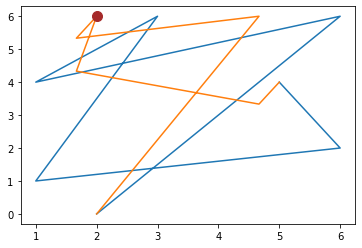

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


w = np.array([[2.0,0.0],[6.0,6.0],[1.0,4.0],[3.0,6.0],[1.0,1.0],[6.0,2.0],[5.0,4.0]])
plt.plot(w[:,0],w[:,1])

x=[2,6]
learning_rate = 1

euclidean_dists = {}
for i in range(7):
  euclidean_dist =  math.sqrt((x[0] - w[i][0])**2 + (x[1] - w[i][1]) ** 2)
  euclidean_dists[i] = euclidean_dist

best_index = sorted(euclidean_dists, key=lambda k: euclidean_dists[k])[0]
print(best_index)

h=[0]*7
h[best_index] =1
h[best_index+1] = 2/3
h[best_index-1] = 2/3
h[best_index+2] = 1/3
h[best_index-2] = 1/3

for i in range(7):
  w[i]+=learning_rate*h[i]*(x-w[i])
 
plt.plot(w[:,0],w[:,1])
plt.plot([2], [6], marker='o', markersize=10, color="brown")

**Problem 8 (Written: 10pts)**

(1) In radial basis function networks, among (a) the RBF units, (b) output units, and (c) RBF-to-output connections, which part is associated the most with  "local" in "local learning"? Explain why. [5pt]

(2) In radial basis function networks, among (a) parameters of the RBF units (center and variance) and (b) RBF-to-output connection weights, which one can be learned in one-shot, without many iterations? Explain why. [5pt] 

Answer 8

(1) Option a: In radial basis function, RBF units are mostly associated with 'local' in 'local learning'. This is because each pth RBF unit is calculated using unsupervised learning and is similar to the mean units of local methods like k-means and SOM. Also, every input in input space can be connected to RBF activation functions due to which the input can be linked to the greatest local RBF activation function. Each RBF unit represents a small area of a network, each of its centers and spreads can be triggered by various inputs, each unit has a unique behavior and therefore each unit learns locally. 

(2) Option b : RBF-to-output connection weights can be learned in one-shot using pseudo inverse. This is because output units are usually linear units. This is shown below:

1.   Case 1 :  $n=H$

    $Pw = y$

    multiplying $P^{-1}$ both sides, we get
  
    $w = P^{-1}y$

2.  Case 2 :  $n>H$

    $(P^{T}P)^{-1}P^{T}Pw = (P^{T}P)^{-1}P^{T}y$

    $P^{-1}(P^{T})^{-1}P^{T}Pw = (P^{T}P)^{-1}P^{T}y$

    since $(P^{T})^{-1}P^{T} = I$ 

    $P^{-1}Pw = (P^{T}P)^{-1}P^{T}y$

    since $P^{-1}P = I$ 

    $w = (P^{T}P)^{-1}P^{T}y$

    This shows that w can be directly calculated in one shot using above formula